### 1. Given the function $ f(x) = -x^{4} + 2x^{3} + 2x^{2} - x $ and it's derivative $f'(x) = {- 4 x^3 + 6 x^2 + 4 x - 1}$

In [1]:
# Standard import and functions
# Run this cell first
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -np.power(x, 4) + 2 * np.power(x, 3) + 2 * np.power(x, 2) - x

def df(x):
    return -4 * np.power(x, 3) + 6 * np.power(x, 2) + 4 * x - 1

#### a. Plot the function, and its gradient (derivative) from $x = -2$ to $x = 3$

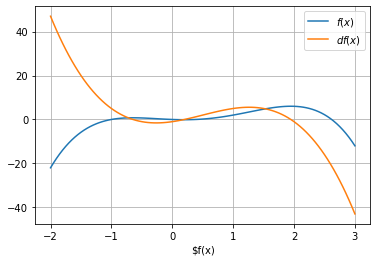

In [11]:
# Add your solution here
x_values = np.linspace(-2, 3, 100)
plt.plot(x_values, f(x_values), label='$f(x)$')
plt.plot(x_values, df(x_values), label='$df(x)$')
plt.xlabel('$x')
plt.xlabel('$f(x)')
plt.grid()
plt.legend()


#### b. Maximize using gradient ascent. You can try step size 0.1 and start somewhere in the range $[-2, 3]$. 

Gradient ascent: $x^{(k+1)} = x^{(k)} + \gamma \Delta f(x^{(k)})$

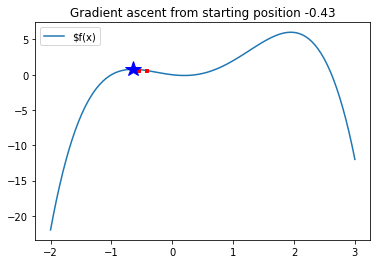

In [23]:
# Add your solution here 
def gradient_ascent(x, gamma=0.1, threshold=1e-6):
    dx = gamma*df(x)
    while np.abs(dx) > threshold:
        plt.plot(x, f(x), color="red", marker="s", markersize=3)
        x = x + dx
        dx = gamma * df(x)
    return x, f(x)

def plot_gradient_ascent(start, stop, steps):
    x = np.linspace(start, stop, steps)
    plt.plot(x, f(x), label='$f(x)')
    randx = np.random.uniform(start, stop)
    end_x, end_y = gradient_ascent(randx, gamma=0.1, threshold=1e-6)
    plt.plot(end_x, end_y, color='blue', marker='*', markersize=16)
    plt.legend()
    plt.title(f"Gradient ascent from starting position {np.around(randx, 2)}")
    plt.show()


plot_gradient_ascent(-2, 3, 100)
    


##### How does the choice of starting point and step size affect the algorithm's performance?

##### Is there a starting point where the algorithm would not even be able to find a local maximum?

# Add your solution here
## Solution:
#### - **By observation it is worth noting that the starting point determines where on the landscape the local or global maxima will be found (since we are working with gradient ascent). The step size will furthermore determine how fast and how precise the gradient ascent will converge towards the maxima. If for instance the starting point is on the far left with a large step size, the area of convergence won`t necessarily be precise (or not converge) enough due to the boundary of convergence. This is also called overshooting**. 

#### - **With a step size to small the time of convergence will be slow since it is incrementing over far more values(checking, poor performance)**.

#### - **If perhaps the starting point is in the center of the landscape it might encounter a gradient of zero and stop**.

#### c. Assume that we are only interested in maxima of $f(x)$, where $-2 \leq x \leq 3$, and x increases in step length of 0.5 ($\Delta x = 0.5$). Perform an exhaustive search to maximize $f(x)$ and plot the result

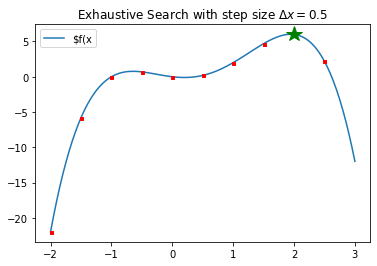

In [25]:
# Add your solution here
def exhaustive_search(start,stop, dx):
    x = start 
    best = (x, f(x))
    while x < stop:
        y = f(x)
        if y > best[1]:
            best = (x, y)
        plt.plot(x, y, color='red', marker='s', markersize=3)
        x += dx
    return best
    
def plot_exhaustive_search(start, stop, step):
    x = np.linspace(start, stop, step)
    step_size = 0.5 
    plt.plot(x, f(x), label='$f(x')
    end_x, end_y = exhaustive_search(start, stop, step_size)
    plt.plot(end_x, end_y, color="green", marker="*", markersize=16)
    plt.legend()
    plt.title(f"Exhaustive Search with step size $\Delta x = {step_size}$")
    plt.show()


plot_exhaustive_search(-2, 3, 100)


#### d. Gradient ascent and hill climbing are quite similar, and they are based almost exclusively on exploitation. Can you think of any additions to these algorithms in order to do more exploration?

# Add your solution here
## Solution:

#### - **Seeing as though from the answer above one could encounter situations where the gradient is zero, it is reasonable to then continue the search either to the left or right form where it encounters zero. This could be done by randomizing a new starting point (or continuation point). Further one could do the search several times to explore more of the landscape and correct the probability of landing in certain regions.**

#### e. Which algorithm do you think is the most efficient at maximizing $f(x)$ under the conditions in Problem **d**; exhaustive search or simulated annealing?

# Add your solution here

## Solution:

#### - It would be reasonable to assume that simulated annealing would be the most beneficial. This is mostly due to the fact that it regulates wheter or not one should move higher or lower in the probability landscape. Thus would it yield on a general note (for bigger datasets and uneven landscapes) a more efficient way of finding local min or max. Only in this example exhaustive search seems to do a better job due to fewer data points in a one dimensional landscape.  